In [1]:
!pip install pytrends
!pip install matplotlib -U

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [123]:
import requests
import json
from pytrends.request import TrendReq # pip install pytrends 해야함. 구글의 검색어 정보를 가져오기 쉽게 해준다.
import matplotlib.pyplot as plt #그래프 그릴거니까 사용
import pandas as pd

plt.rcParams['font.family']=['NanumGothic', 'sans-serif'] # 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False

In [124]:
url = 'http://tools.kinds.or.kr:8888/time_line'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": "말레이항공", 
        "published_at": {
            "from": "2010-01-01",
            "until": "2018-12-31"
            },
        
        "provider": [""],
        "category": [""],
        "category_incident": [ ""],
        "byline": "", 
        "provider_subject": [""],
        "interval": "month", 
        "normalize": False,
        }
}

response = requests.post(url, data=json.dumps(datas))
response = response.json()

In [125]:
response

{'result': 0,
 'return_object': {'time_line': [{'hits': 4, 'label': '201007'},
   {'hits': 1, 'label': '201008'},
   {'hits': 0, 'label': '201009'},
   {'hits': 0, 'label': '201010'},
   {'hits': 0, 'label': '201011'},
   {'hits': 0, 'label': '201012'},
   {'hits': 0, 'label': '201101'},
   {'hits': 0, 'label': '201102'},
   {'hits': 0, 'label': '201103'},
   {'hits': 0, 'label': '201104'},
   {'hits': 0, 'label': '201105'},
   {'hits': 0, 'label': '201106'},
   {'hits': 0, 'label': '201107'},
   {'hits': 0, 'label': '201108'},
   {'hits': 0, 'label': '201109'},
   {'hits': 0, 'label': '201110'},
   {'hits': 0, 'label': '201111'},
   {'hits': 0, 'label': '201112'},
   {'hits': 0, 'label': '201201'},
   {'hits': 0, 'label': '201202'},
   {'hits': 0, 'label': '201203'},
   {'hits': 0, 'label': '201204'},
   {'hits': 0, 'label': '201205'},
   {'hits': 0, 'label': '201206'},
   {'hits': 0, 'label': '201207'},
   {'hits': 0, 'label': '201208'},
   {'hits': 0, 'label': '201209'},
   {'hits':

In [126]:
keyword1 = "말레이항공"

# Google trend 접속, 데이터 획득
trend_obj = TrendReq()
trend_obj.build_payload(kw_list=[keyword1], timeframe="2010-01-01 2018-12-31") # kw_list는 최대 5개

# 각각 키워드의 검색량 획득
trend_df = trend_obj.interest_over_time()

In [127]:
day_dict = {}
big_list = []
trend_list = []
for i in response['return_object']['time_line']:
    if int(i['label']) > 201212:
        day_dict[i['label'][:4]+'-'+i['label'][4:]] = 0
        big_list.append(i['hits'])

for i in trend_df.items():
    for day, value in zip(i[1].index, i[1].items()):
        if str(day)[:7] in day_dict:
            day_dict[str(day)[:7]] += value[1]
    break
day_dict # keys = index, velues = trend_data
trend_list = list(day_dict.values())


In [128]:
b = pd.DataFrame({"빅카인즈":big_list, "구글트렌드":trend_list}, index=day_dict.keys())

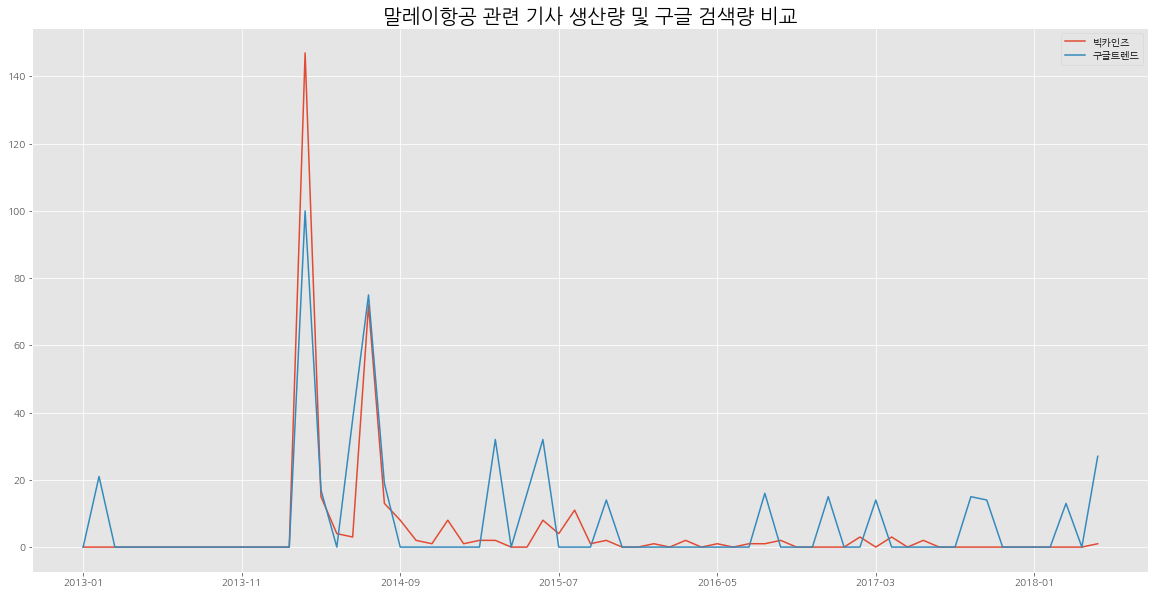

In [129]:
x = list(bigK_dict.keys())
plt.style.use("ggplot")
plt.figure(figsize=(20,10))

b['빅카인즈'].plot()
b['구글트렌드'].plot()

plt.title("말레이항공 관련 기사 생산량 및 구글 검색량 비교", size=20)
plt.legend(loc="best")
plt.show()